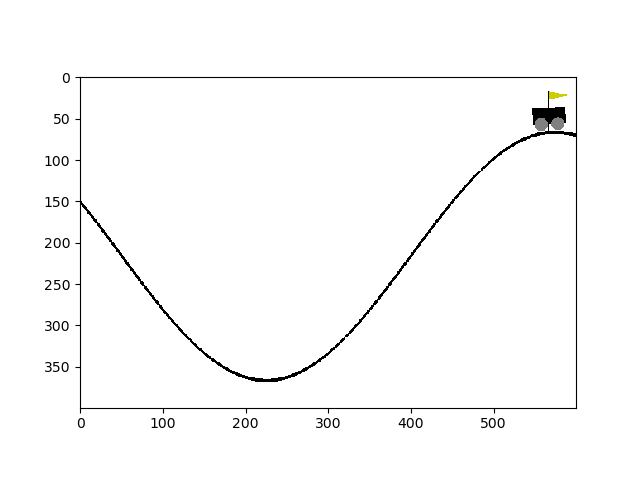

## Explore environment object

- env.observation_space
- env.action_space 

- env.reset() : reset environment to initial state, return first observation
- env.render(): show current environment state (a more colorful version :) )
- env.step(action) : commit action a and return (new observation, reward, is done, info)

## CartPole

The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

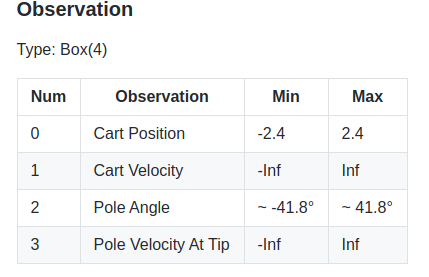

In [7]:
import gym

env = gym.make('CartPole-v0')

print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()

print('initial observation:', obs)

action = env.action_space.sample()  # take a random action

obs, r, done, info = env.step(action)

print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

/home/julian/anaconda3/envs/RL/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


observation space: Box(4,)
action space: Discrete(2)
initial observation: [-0.00764876 -0.03215941 -0.02468061 -0.00682664]
next observation: [-0.00829195 -0.22691887 -0.02481714  0.27796822]
reward: 1.0
done: False
info: {}


In [10]:
for i_episode in range(20):
    
    observation = env.reset()
    
    for t in range(10):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

[ 0.03086527  0.04109575 -0.03501461 -0.01210769]
[ 0.03168719  0.23670191 -0.03525676 -0.31562927]
[ 0.03642123  0.43230786 -0.04156935 -0.6192192 ]
[ 0.04506738  0.62798502 -0.05395373 -0.92469924]
[ 0.05762708  0.82379259 -0.07244771 -1.23383791]
[ 0.07410294  1.01976728 -0.09712447 -1.54830982]
[ 0.09449828  1.21591164 -0.12809067 -1.86964948]
[ 0.11881651  1.02240208 -0.16548366 -1.61931885]
[ 0.13926456  1.21904236 -0.19787004 -1.95868021]
Episode finished after 9 timesteps
[-0.04792077  0.01652424  0.04054775 -0.0063036 ]
[-0.04759028 -0.17915506  0.04042168  0.29889186]
[-0.05117338 -0.37482919  0.04639951  0.60404403]
[-0.05866997 -0.5705683   0.0584804   0.91097326]
[-0.07008133 -0.76643075  0.07669986  1.22144815]
[-0.08540995 -0.57237632  0.10112882  0.95374993]
[-0.09685747 -0.76870273  0.12020382  1.27641617]
[-0.11223153 -0.575301    0.14573215  1.02366178]
[-0.12373755 -0.77203148  0.16620538  1.35832319]
[-0.13917818 -0.96880153  0.19337185  1.69805064]
Episode finishe

[ 0.01526542 -0.19498479 -0.03793601  0.23862969]
[ 0.01136572  0.00065799 -0.03316341 -0.06577386]
[ 0.01137888 -0.19397318 -0.03447889  0.21626411]
[ 0.00749942 -0.38858569 -0.03015361  0.4978746 ]
[-0.00027229 -0.19305185 -0.02019611  0.19584335]
[-0.00413333  0.00235307 -0.01627925 -0.10314152]
[-0.00408627  0.1977045  -0.01834208 -0.40091571]
[-0.02759668  0.01770816  0.02249673  0.01616353]
[-0.02724251  0.21250038  0.02282    -0.26933739]
[-0.02299251  0.01706033  0.01743325  0.03045486]
[-0.0226513   0.211928    0.01804235 -0.25667711]
[-0.01841274  0.01655316  0.0129088   0.04164161]
[-0.01808168  0.21148765  0.01374164 -0.24694068]
[-0.01385192  0.40641067  0.00880282 -0.5352577 ]
[-0.00572371  0.21116605 -0.00190233 -0.23981411]
[-0.00150039  0.40631512 -0.00669861 -0.53309648]
[ 0.00662591  0.21128802 -0.01736054 -0.24253177]
[ 0.03163623 -0.02904046 -0.00388928 -0.0403015 ]
[ 0.03105542  0.16613705 -0.00469531 -0.33420899]
[ 0.03437816 -0.02891776 -0.01137949 -0.04301041]


In [3]:
env.close()

## MountainCar
https://github.com/openai/gym/wiki/MountainCar-v0

In [4]:
import gym

env = gym.make("MountainCar-v0")

env.reset()

env.render('rgb_array')#, close = True)

#plt.imshow(env.render('rgb_array')) #colab
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

#
# take random actions and show the video result
# In MountainCar, observation is just two numbers: 
# car position and velocity
#
observation = env.reset()
print("initial observation code:", observation)

Observation space: Box(2,)
Action space: Discrete(3)
initial observation code: [-0.53781631  0.        ]


Open AI Gym presenta una implementación clásica del ciclo agente-ambiente (agent-environment loop)

<img src="env-loop.PNG">


Para realizar una acción se invoca la función step (del environment) con parámetro la acción que se desea realizar. 

Esta función devuelve cuatro valores:

observation(objeto): es una observación, un objeto específico de cada environment. Por ejemplo imágenes de una cámara, ángulos y velocidades de las articulaciones de un robot, o el estado del tablero en un juego de tableros.

reward(float): es la recompensa recibida por cada acción. 

done(boolean): indica si terminó un episodio, la mayor parte de las tareas están divididas en episodios.

info(dict): información de diagnóstico útil para debuguear, a veces es tambipen útil para aprender comportamientos, pero los agentes no deberían utilizar esta información porque deben aprender de las observaciones y recompensas.

El proceso recomienza al usar la función reset()

# Espacios

También podemos chequear si una elemento pertenece a un espacio o cuál es el tamaño del espacio:

In [ ]:
#import numpy as np
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()

print(space.contains(x))
space.n 

#space = spaces.Box(low=np.array([0.0,0.0]), high=np.array([1.0,1.0]))
#assert space.contains(np.array([0.5,0.5]))
#assert space.contains(np.array([2.0,2.0]))


In [18]:
%matplotlib inline
import gym
import matplotlib.pyplot as plt
import time

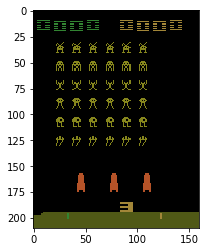

In [12]:
# ejemplo de Atari
# para instalar: pip3 install 'gym[atari]'
import matplotlib as plt

import gym
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.pyplot.imshow(env.render(mode='rgb_array'))

La razón por la que fue creado Open AI Gym fue para atacar dos problemas en la investigación en RL: 

* La necesidad de mejores benchmarks. Gran parte del avanze en aprendizaje supervisado se debió a la disponibilidad de grandes datasets rotulados, como Imagenet. En RL no había algo semejante, no había colecciones de ambientes de RL que tuvieran gran variedad y fueran fáciles de configurar y usar.

* Falta de estandarización de los ambientes usados en publicaciones. Sutiles diferencias en la definición de un problema, como la función recompensa o el conjunto de acciones, pueden cambiar la dificultad de un problema drásticamente. Este inconveniente hace más difícil reproducir los resultados y comparar diferentes papers.

### Jugar con OpenAI gym

Abajo hay código que maneja un auto hacia la derecha.

Pero no llega a alcanzar la bandera a la derecha por la gravedad.

__Tu objetivo__ es arreglarlo. Encontrá una política que alcance la bandera.

No hay que diseñar ningún algoritmo sofisticado, podés hardcodear todo.

_Pista: la acción a cada paso debe depender de t o s ._

In [15]:
import matplotlib as plt

In [20]:
# Crear el ambiente manualmente para imponer límite de tiempo
TIME_LIMIT = 250

env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(), 
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

<IPython.core.display.Javascript object>


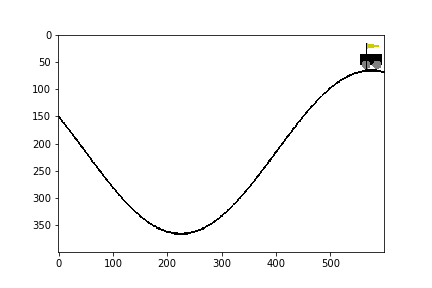

In [21]:
# preparar el display
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

In [23]:
actions['left']

0

In [24]:
s = env.reset()
eps_v = 0.01 
def policy(s, t):
    if (s[1]>0 and s[0]<0):
        accion = 'right'
    elif (s[1]<0 and s[0]>0):
        accion = 'left'
    else :
        if s[0]<0:
            accion = 'left'
        elif s[0]>0:
            accion = 'right'
    return actions[accion]


for t in range(TIME_LIMIT):
    
    s, r, done, _ = env.step(policy(s, t))
    
    #dibujar imagen
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Éxito!")
        break
else:    
    print("Límite de tiempo cumplido. Intentá de nuevo!")

Éxito!
